In [13]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
from IPython import display
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*30)

import os
import glob
glob.glob(os.getcwd()+'\\*.csv')

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.23.4
matplotlib version: 3.0.2
NumPy version: 1.16.0
SciPy version: 1.2.0
IPython version: 6.2.1
scikit-learn version: 0.20.2
------------------------------


['C:\\Users\\yhq34\\Desktop\\Gavin\\Python\\titanic_survival_prediction\\gender_submission.csv',
 'C:\\Users\\yhq34\\Desktop\\Gavin\\Python\\titanic_survival_prediction\\test.csv',
 'C:\\Users\\yhq34\\Desktop\\Gavin\\Python\\titanic_survival_prediction\\train.csv']

In [15]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [38]:
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

data1 = data_raw.copy(deep=True)

data_cleaner = [data1, data_val]

print(data_raw.info())
# data_raw.head()
# data_raw.tail()
data_raw.sample(10)
# data_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [33]:
print('Training set columns with null values: \n', data1.isnull().sum())
print("-"*10)
print('Testing set columns with null values: \n', data_val.isnull().sum())
print("-"*10)
data_raw.describe(include='all')

Training set columns with null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Testing set columns with null values: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gilinski, Mr. Eliezer",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [40]:
for dataset in data_cleaner:
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    
    #complete missing embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    
    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

In [45]:
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [161]:
for dataset in data_cleaner:
    #calculate family size
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    #is alone?
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    #get the person's title from variable, name
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    
    #binning fares by quartiles
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    
    #binning age in 5 equally spaced bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [162]:
stat_min = 10
title_names = data1['Title'].value_counts() < stat_min
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

print(data1['Title'].value_counts())
print('-'*10)

data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null category
AgeBin           891 non-null category
Sex_Code         891 non-null int32
Embarked_Code    891 non-null int32
Title_Code       891 non-null int32
FareBin_Code     891 non-null int32
AgeBin_Code      891 non-null int32
dtypes: category(2), float64(2), int32(5), int64(6), object(4)
memory usage: 102.9+ KB
<cl

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,FareBin_Code,AgeBin_Code
209,1,1,"Blank, Mr. Henry",male,40.0,0,0,31.0000,C,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]",1,0,3,2,2
720,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,33.0000,S,2,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]",0,2,2,3,0
384,0,3,"Plotcharsky, Mr. Vasil",male,28.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,0,1
495,0,3,"Yousseff, Mr. Gerious",male,28.0,0,0,14.4583,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,0,3,2,1
285,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,8.6625,C,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,0,3,1,2
17,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]",1,2,3,1,1
224,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,90.0000,S,2,0,Mr,"(31.0, 512.329]","(32.0, 48.0]",1,2,3,3,2
864,0,2,"Gill, Mr. John William",male,24.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]",1,2,3,1,1
637,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,26.2500,S,3,0,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,2,3,2,1
331,0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]",1,2,3,2,2


In [163]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])

#define y variable
Target = ['Survived']

#define original x's
data1_x = ['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone']
data1_x_calc = ['Sex_Code','Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']
data1_xy = Target + data1_x
print('Original X Y: ', data1_xy)

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']


In [164]:
data1_x_bin = ['Sex_Code','Pclass','Embarked_Code','Title_Code','FamilySize','AgeBin_Code','FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin)

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']


In [165]:
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy)

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


In [166]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [167]:
print('Training set columns with null values: \n', data1.isnull().sum())
print('-'*15)
print(data1.info())
print('-'*15)

print('Testing set columns with null values: \n', data_val.isnull().sum())
print('-'*15)
print(data_val.info())

Training set columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
FareBin_Code     0
AgeBin_Code      0
dtype: int64
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non

In [168]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state=0)

print('Data1 Shape: {}'.format(data1.shape))
print('Train1 Shape: {}'.format(train1_x.shape))
print('Test1 Shape: {}'.format(test1_x.shape))



Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


In [170]:
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Rate by: {} \n'.format(x))
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*25)

print(pd.crosstab(data1['Title'], data1[Target[0]]))

Survival Rate by: Sex 

      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------------
Survival Rate by: Pclass 

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------------
Survival Rate by: Embarked 

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
-------------------------
Survival Rate by: Title 

    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
-------------------------
Survival Rate by: SibSp 

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
-------------------------
Survival Rate by: Parch 

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
-------------------------
Survival Rate by: FamilySize 

   Fami

Text(0, 0.5, 'Fare ($)')

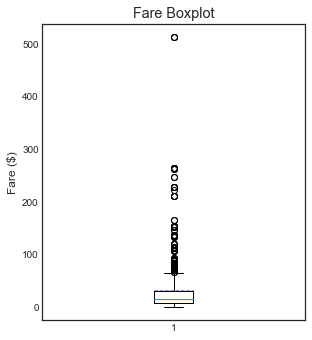

In [172]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')